In [ ]:
"""
Advertising Sales data
Finding the best fit line using OLS (ordinary least square) model
Error anlysis is done by plotting the histogram of the errors
"""

In [1]:
# Importing 

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 

# supress the warning 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset

advertising = pd.read_csv('D:Advertising.csv')
advertising

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
# Peeking the data

advertising.shape

(200, 5)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
advertising.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


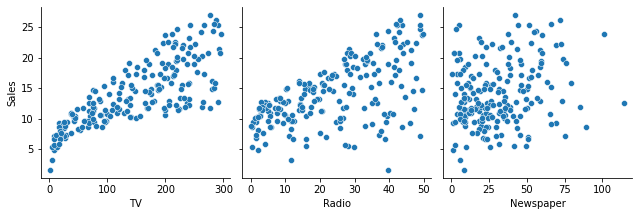

In [6]:
#Visualisation

sns.pairplot(advertising, x_vars = ['TV', 'Radio' , 'Newspaper'] , y_vars = 'Sales', size = 3 , kind = 'scatter')

<AxesSubplot:>

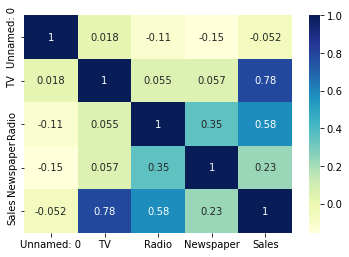

In [7]:
sns.heatmap(advertising.corr() , cmap = 'YlGnBu'  , annot = True)

In [8]:
x = advertising['TV']
y = advertising['Sales']

In [9]:
# Splitting the data into Train and Test (70:30)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,train_size =0.7, test_size = 0.3, random_state = 1)

In [10]:
X_train

116    139.2
67     139.3
78       5.4
42     293.6
17     281.4
       ...  
133    219.8
137    273.7
72      26.8
140     73.4
37      74.7
Name: TV, Length: 140, dtype: float64

In [11]:
X_test.head()

58     210.8
40     202.5
34      95.7
102    280.2
184    253.8
Name: TV, dtype: float64

In [12]:
import statsmodels.api as sm

In [13]:
# Adding a constant (to get an intercept)

X_train_sm = sm.add_constant(X_train) # y = mx +c 

In [15]:
# fitting the model using OLS (sm)

lr = sm.OLS(Y_train, X_train_sm).fit() 

In [16]:
lr.params   # tv = m(slope) of tv

const    6.923520
TV       0.048122
dtype: float64

In [17]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     228.4
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           4.71e-31
Time:                        17:40:45   Log-Likelihood:                -363.19
No. Observations:                 140   AIC:                             730.4
Df Residuals:                     138   BIC:                             736.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9235      0.532     13.025      0.000       5.872       7.975
TV             0.0481      0.003     15.112      0.000       0.042       0.054
==============================================================================
Omnibus:                        0.320   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.852   Jarque-Bera (JB):                0.427
Skew:                          -0.106   Prob(JB):                        0.808
Kurtosis:                       2.831   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

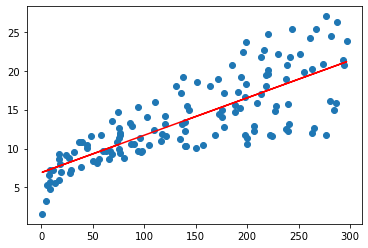

In [18]:
# Visualize the regression line - Best fit line 
   
plt.scatter(X_train,Y_train)
plt.plot(X_train, 6.92 + 0.048*X_train, 'r'  ) #(x , c+m*x, 'colour-r')
plt.show()

In [19]:
# Error analysis
y_train_pred = lr.predict(X_train_sm)
res= (Y_train-y_train_pred)

Text(0, 0.5, 'frequency')

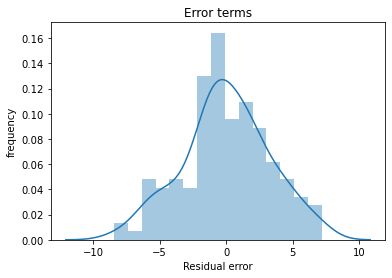

In [20]:
# Plotting the histogram of the errors

sns.distplot(res,bins =15)
plt.title('Error terms')
plt.xlabel ('Residual error')
plt.ylabel('frequency')

In [21]:
# Adding Constant 
X_test_sm = sm.add_constant(X_test) 

In [22]:
# Predicting
y_test_pred = lr.predict(X_test_sm)

In [23]:
res_test = (Y_test - y_test_pred)

Text(0, 0.5, 'frequency')

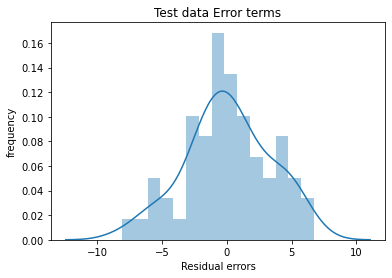

In [24]:
# Plotting the Histogram of the errors 

sns.distplot(res_test,bins =15)
plt.title('Test data Error terms')
plt.xlabel ('Residual errors')
plt.ylabel('frequency')

In [25]:
from sklearn.metrics import r2_score

r_sq = r2_score(Y_test, y_test_pred)
r_sq

0.5750618604943311

In [26]:
from sklearn.metrics import r2_score
r_sq = r2_score(Y_train, y_train_pred)
r_sq

0.6233294771480009

In [ ]:
"""
The model has perfommed 57% on test data and 62% on traning data. It
is a fairely robust model which perfrom almost same conclusion on both the data sets.
           
"""